Importing the Libraries

In [1]:
#Importing Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Loading the Dataset

In [2]:
car_data = pd.read_csv('data.csv')

Data Pre-processing

In [3]:
car_data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
#Checking the rows and columns
car_data.shape

(398, 9)

In [5]:
#Getting the info about the dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
#Checking for the null values / missing values
car_data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [7]:
#Checking the distribution of the categorical data
print(car_data.name.value_counts())

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64


Data Visualization

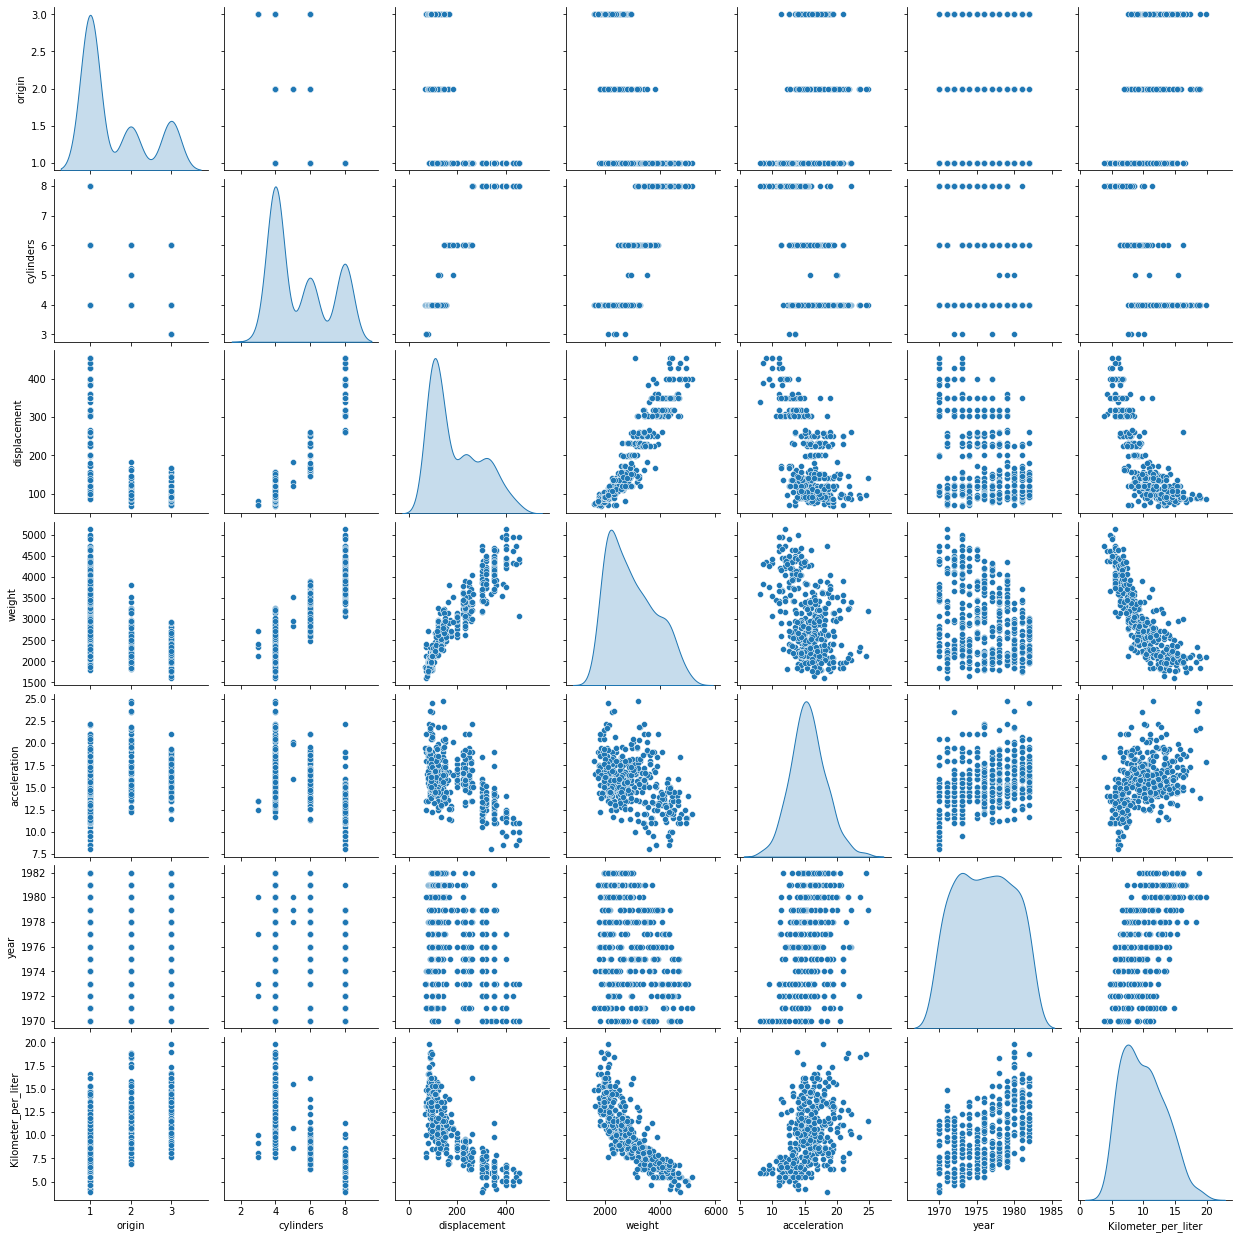

In [8]:
sns.pairplot(car_data, diag_kind='kde')

Splitting training and test set

In [9]:
X = car_data.drop(['name', 'origin', 'horsepower', 'Kilometer_per_liter'], axis=1)
y = car_data['Kilometer_per_liter']

In [10]:
X

,cylinders,displacement,weight,acceleration,year
0,8,307.0,3504,12.0,1970
1,8,350.0,3693,11.5,1970
2,8,318.0,3436,11.0,1970
3,8,304.0,3433,12.0,1970
4,8,302.0,3449,10.5,1970
...,...,...,...,...,...
393,4,140.0,2790,15.6,1982
394,4,97.0,2130,24.6,1982
395,4,135.0,2295,11.6,1982
396,4,120.0,2625,18.6,1982


In [11]:
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 398, dtype: float64

In [12]:
#Splitting the Training and the Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=101)

Model Training 
Linear Regression

In [13]:
#Loading the Linear Regression model
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [15]:
#prediction on Training Data
test_predictions = model.predict(X_test)

In [16]:
test_predictions

array([10.83004568,  9.57884913, 13.73108195,  3.66160092,  4.96746515,
       11.32318613, 14.51576242, 11.12036982, 11.28192988, 10.69490325,
       10.94572404, 11.70954619, 14.2475342 , 11.66146567,  7.12981129,
        7.76442711,  8.55541905,  8.43101408, 10.54230515, 10.92380326,
        3.45576762, 10.28490795, 12.93348521,  8.57239047,  6.45175272,
       13.33560288, 11.18876359, 13.11041739,  7.08551592,  4.27801897,
        8.85343046, 13.97419586, 11.00032703, 11.13320651, 10.96712407,
        4.83498072, 12.12967241, 13.37123309,  6.66233353, 10.77641662,
       14.40050831,  6.89512942, 11.32082458,  5.9226578 ,  9.01525891,
        8.28567209, 11.880989  ,  9.66135586,  8.78170592, 13.42300066,
        9.02268355,  9.55613181,  9.9258279 , 11.43342552,  6.52245278,
       12.36576725, 14.24798859, 11.23500699,  7.1070116 , 13.55234361,
       12.57837189, 10.81007935, 14.42617063,  8.16957748,  9.14176408,
       10.07625295, 12.72183022, 13.88643089,  5.22666828,  5.43

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Calculating Mean Absolute Error (MAE)

In [18]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

1.1296866496468705

Calculating Mean Squared Error (MSE)

In [19]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

2.238019839995542

Root Mean Squared Error

In [20]:
RMSE = np.sqrt(MSE)
RMSE

1.4960012834204195

In [24]:
#Predictions on Test Set
test_data_pred_test = model.predict(X_test)

In [25]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_data_pred_test

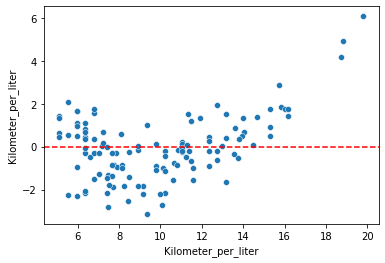

In [26]:
sns.scatterplot(x=y_test,y=test_res)
py.axhline(y=0, color='r', linestyle='--')

In [27]:
len(test_res)

120

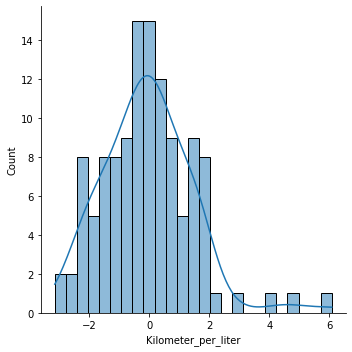

In [28]:
sns.displot(test_res,bins=25,kde=True)

In [29]:
import scipy as sp

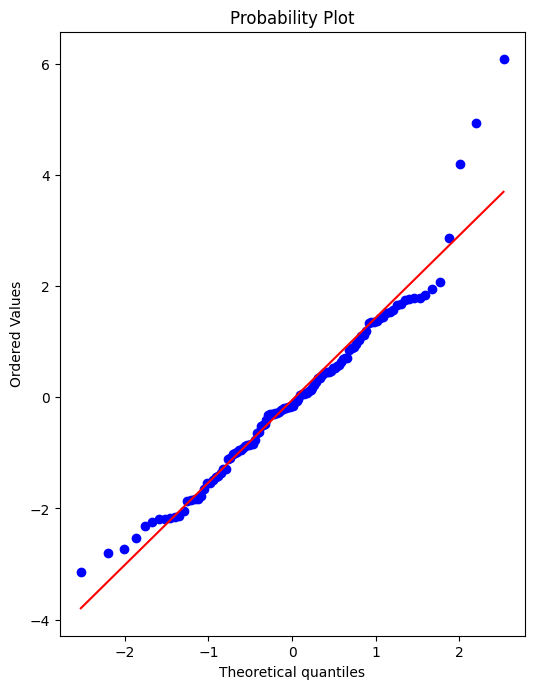

In [30]:
# Create a figure and axis to plot on
fig, ax = py.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

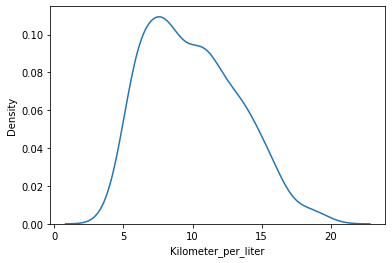

In [54]:
sns.kdeplot(car_data['Kilometer_per_liter'])

Retraining the model

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

In [33]:
y_hat = final_model.predict(X)

In [41]:
residuals = y_hat - y

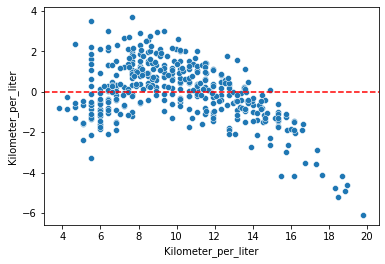

In [42]:
sns.scatterplot(x=y,y=residuals)
py.axhline(y=0, color='r', linestyle='--')

Coefficients

In [43]:
final_model.coef_

array([-0.10993585,  0.00308982, -0.00294442,  0.03415922,  0.3211114 ])

In [44]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cylinders,-0.109936
displacement,0.003090
weight,-0.002944
acceleration,0.034159
year,0.321111


In [46]:
car_data.corr()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
weight,-0.581024,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


Predictions on new data

In [51]:
test_data = [[1.000000,	-0.581024,	0.205873,	0.180662,	0.563450]]

In [52]:
final_model.predict(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-616.23111068])